# <center> Predict Effects of Climate Change on Crop Yields 

# Table of content
1. Import Packages 
2. Reading Data 
3. Data Exploration
4. Data Preprocessing
5. Modeling and Evalution

> Target : Predict Effects of climate Change on Crop Yields 

# Import Packages

In [1]:
# Packages for EDA 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
np.seterr(divide='ignore', invalid='ignore', over='ignore')


# Showing Plots inside notebook
%matplotlib inline  
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2) # Standard figure size for all 
import warnings
warnings.filterwarnings("ignore")

# File Reading

In [2]:
df = pd.read_csv("climate-ds.csv",index_col=[0])
df.sample(10)

Area         Item  Year  average_rain_fall_mm_per_year  \
21093      Nepal  Rice, paddy  2001                           1500   
1029   Australia     Potatoes  1995                            534   
16607      Japan        Maize  2000                           1668   
26827     Turkey        Maize  2002                            593   
15223  Indonesia     Soybeans  2009                           2702   
7692     Ecuador     Soybeans  1998                           2274   
18374     Malawi        Maize  2009                           1181   
13211      India  Rice, paddy  2006                           1083   
8381       Egypt     Soybeans  2012                             51   
22412   Pakistan     Potatoes  2001                            494   

       pesticides_tonnes  avg_temp  hg/ha_yield  
21093             122.04     15.41        27454  
1029            25598.00     16.95       298183  
16607           79821.18     15.67        24713  
26827           27915.00     12.24        42163  
15223            1597.00     27.31        13483  
7692            21500.00     22.59        12691  
18374             736.25     20.68        22265  
13211           37423.00     24.72        31759  
8381            13991.00     21.55        36186  
22412           11871.00     23.62       164180

# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [4]:
df.describe()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  \
count  28242.000000                    28242.00000       28242.000000   
mean    2001.544296                     1149.05598       37076.909344   
std        7.051905                      709.81215       59958.784665   
min     1990.000000                       51.00000           0.040000   
25%     1995.000000                      593.00000        1702.000000   
50%     2001.000000                     1083.00000       17529.440000   
75%     2008.000000                     1668.00000       48687.880000   
max     2013.000000                     3240.00000      367778.000000   

           avg_temp    hg/ha_yield  
count  28242.000000   28242.000000  
mean      20.542627   77053.332094  
std        6.312051   84956.612897  
min        1.300000      50.000000  
25%       16.702500   19919.250000  
50%       21.510000   38295.000000  
75%       26.000000  104676.750000  
max       30.650000  501412.000000

In [5]:
df.duplicated().sum()

2310

> Drop duplicated values

In [6]:
df.drop_duplicates(inplace=True)

### Area

In [7]:
df['Area'].value_counts()

India         3384
Brazil        1854
Mexico        1280
Australia      966
Pakistan       966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Area, Length: 101, dtype: int64

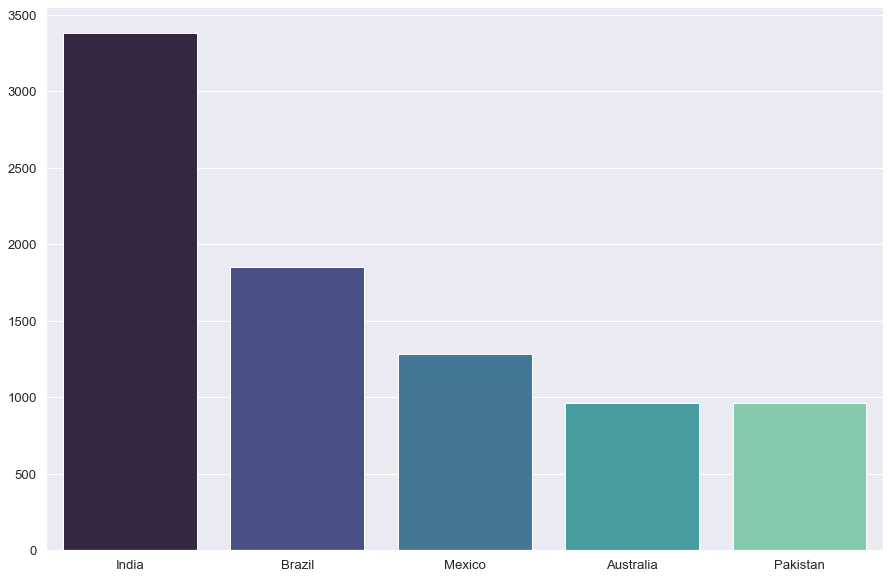

In [8]:
sns.barplot(y=df['Area'].value_counts().head().values,x=df['Area'].value_counts().head().index,palette = 'mako');

### Item

In [9]:
df['Item'].value_counts()

Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: Item, dtype: int64

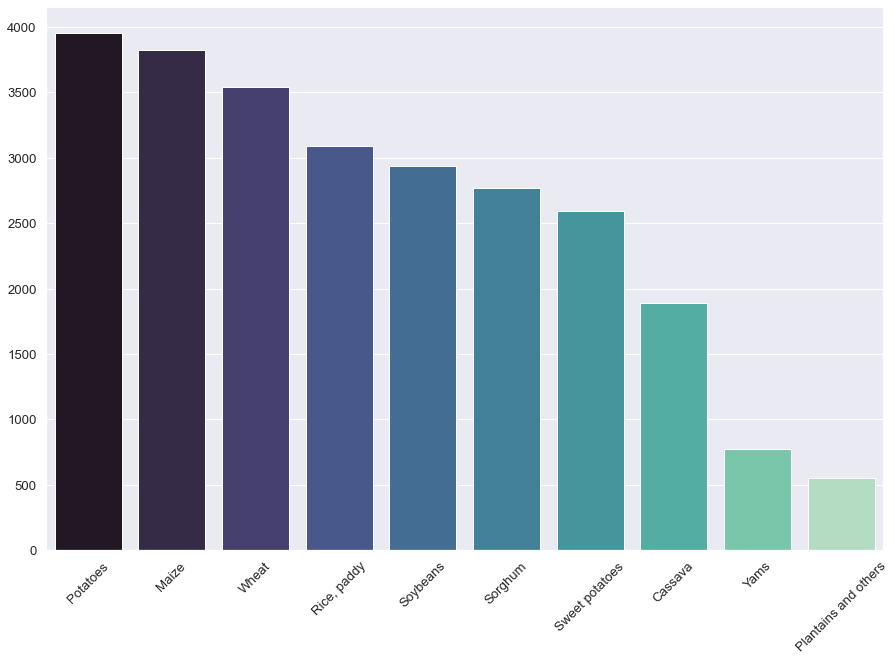

In [10]:
sns.barplot(y=df['Item'].value_counts().values,x=df['Item'].value_counts().index,palette = 'mako');
plt.xticks(rotation=45);

### Year

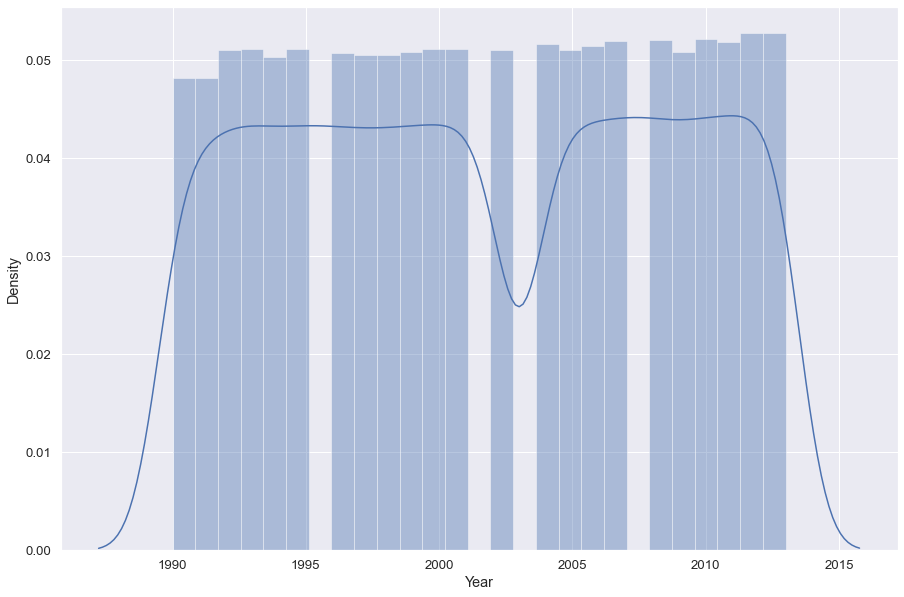

In [11]:
sns.distplot(df['Year']);

> Year is considered a discrete Values

### average rain fall mm per year

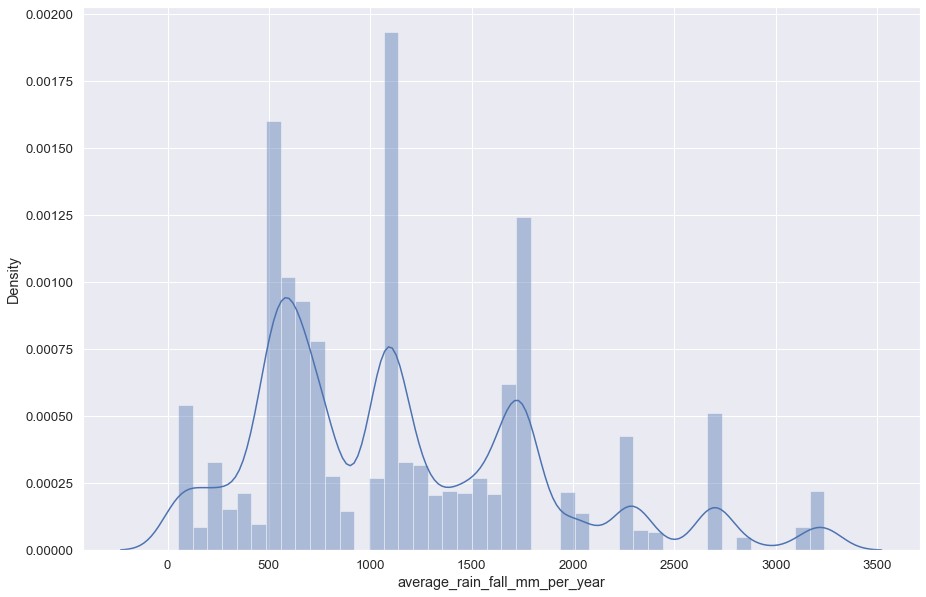

In [12]:
sns.distplot(df['average_rain_fall_mm_per_year']);

### pesticides tonnes

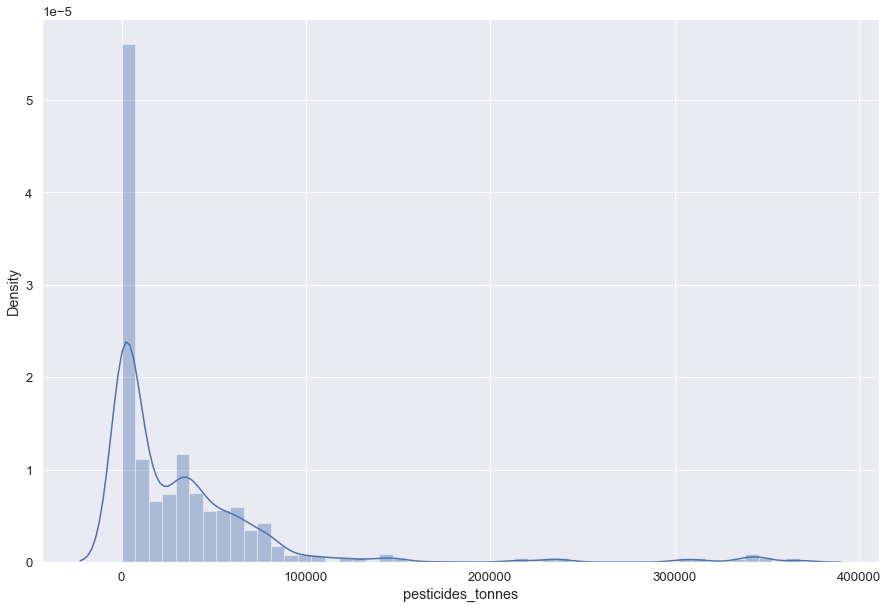

In [13]:
sns.distplot(df['pesticides_tonnes']);

> pesticides tonnes Data **Skewed Left**

### average tempreture

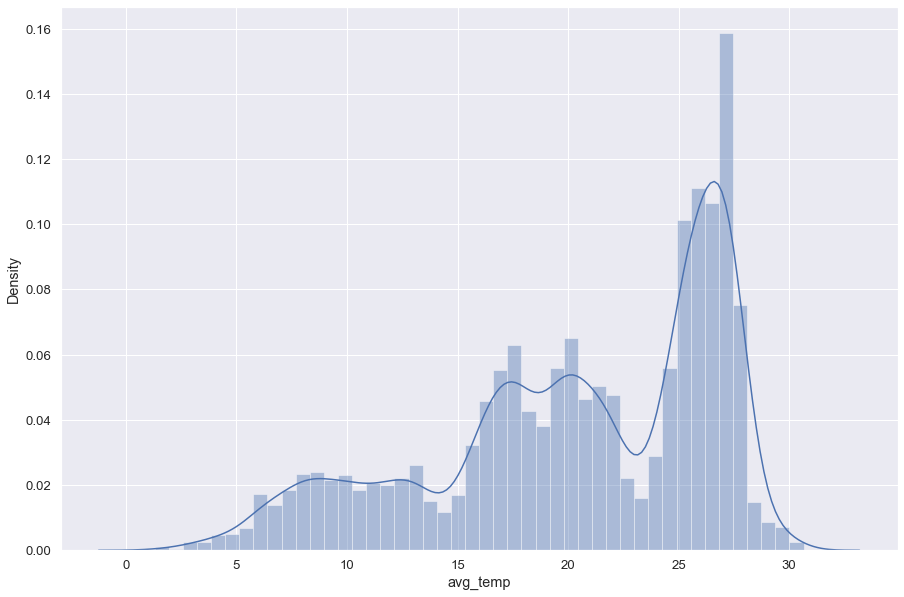

In [14]:
sns.distplot(df['avg_temp']);

> pesticides tonnes Data is mostly **Skewed right**

### hg/ha_yield (Target)

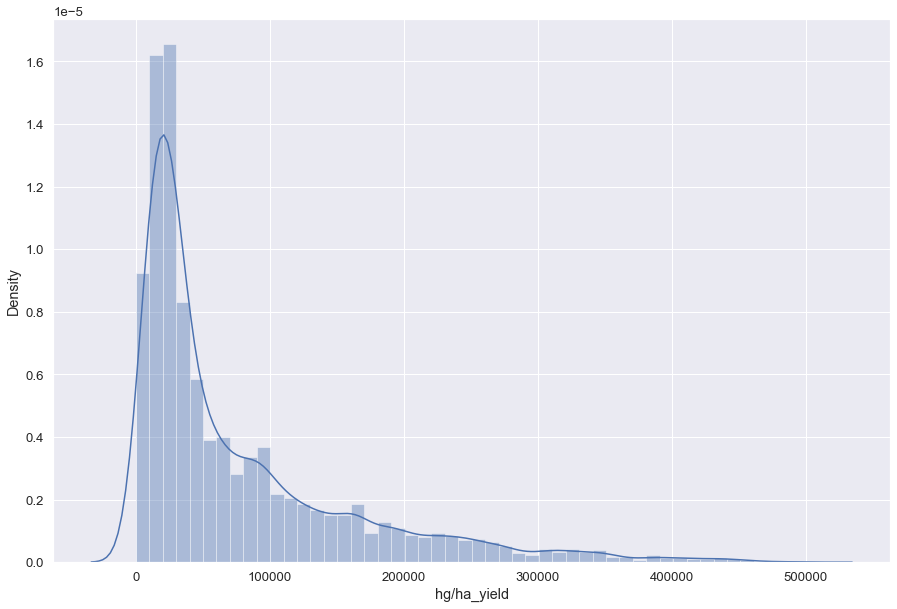

In [15]:
sns.distplot(df['hg/ha_yield']);

> pesticides tonnes Data is mostly **Skewed left**

# Data preprocessing

## Resample Data and Scaling it.

In [16]:
num = df.select_dtypes(exclude='object').columns
num

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'hg/ha_yield'],
      dtype='object')

In [17]:
scaler_trans = PowerTransformer()
scaler_trans.fit(df[num])

PowerTransformer()

In [18]:
df[num] = scaler_trans.transform(df[num]) 

> Using Power transformer to resample Data 

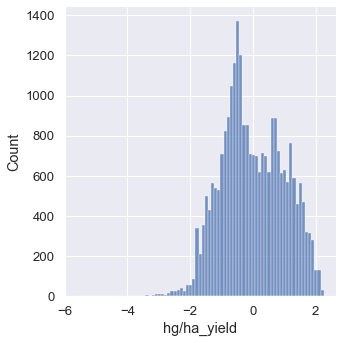

In [19]:
sns.displot(df['hg/ha_yield']);

- Now data is Almost __Normally distriputed__

## Data encoding (one hot encoder)

In [20]:
df = pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0 -1.644799                       0.602304          -1.499545 -0.772451   
1 -1.644799                       0.602304          -1.499545 -0.772451   
2 -1.644799                       0.602304          -1.499545 -0.772451   
3 -1.644799                       0.602304          -1.499545 -0.772451   
4 -1.644799                       0.602304          -1.499545 -0.772451   

   hg/ha_yield  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia  \
0    -0.173934             0            0               0             0   
1     0.369060             0            0               0             0   
2    -0.576696             0            0               0             0   
3    -1.127044             0            0               0             0   
4    -1.630491             0            0               0             0   

   Area_Australia  ...  Area_Zimbabwe  Item_Maize  Item_Plantains and others  \
0               0  ...              0           1                          0   
1               0  ...              0           0                          0   
2               0  ...              0           0                          0   
3               0  ...              0           0                          0   
4               0  ...              0           0                          0   

   Item_Potatoes  Item_Rice, paddy  Item_Sorghum  Item_Soybeans  \
0              0                 0             0              0   
1              1                 0             0              0   
2              0                 1             0              0   
3              0                 0             1              0   
4              0                 0             0              1   

   Item_Sweet potatoes  Item_Wheat  Item_Yams  
0                    0           0          0  
1                    0           0          0  
2                    0           0          0  
3                    0           0          0  
4                    0           0          0  

[5 rows x 114 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25932 entries, 0 to 28241
Columns: 114 entries, Year to Item_Yams
dtypes: float64(5), uint8(109)
memory usage: 3.9 MB


## Data Spliting

In [23]:
# define dataset
X, y = df.drop("hg/ha_yield",axis=1) , df["hg/ha_yield"] 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Modeling (RandomForest)

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [27]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Train Accuract R2-Square: ",round(model.score(X_train,y_train)*100,2))
print("Test Accuract R2-Square: ",round(model.score(X_test,y_test)*100,2))
print("Train Accuract R2-Square: ",mean_squared_error(y_test,y_pred))

Train Accuract R2-Square:  99.72
Test Accuract R2-Square:  97.97
Train Accuract R2-Square:  0.020550297347361378


> The best accuracy reached out is 97% 

# <center> Done